In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from wrapper import ModeShareEvaluator

# Prepare the evaluator
evaluator = ModeShareEvaluator()

In [3]:
from boptx.problem import ContinuousProblem

# Prepare the problem
problem = ContinuousProblem(
    3, [(-5, 5), (-5, 5), (-5, 5)], [0.0, 0.0, 0.0]
)

In [4]:
from boptx.algorithms import CMAES1P1Algorithm

# Prepare the algorithm
algorithm = CMAES1P1Algorithm(problem)

In [5]:
from boptx.loop import Loop

# Prepare the calibration loop
loop = Loop(
    algorithm = algorithm,
    evaluator = evaluator,
    maximum_evaluations = 200,
)

In [6]:
from boptx.tracker import Tracker

# Prepare tracking of the calibration
objectives = []
values = []

def my_tracker(state, evaluations):
    for evaluation in evaluations:
        values.append(evaluation.get_values())
        objectives.append(evaluation.get_objective())
        
    if len(values) % 20 == 0:
        print("Finished evaluations: ", len(values))

# Start the calibration
loop.advance(callback = my_tracker)

Finished evaluations:  20
Finished evaluations:  40
Finished evaluations:  60
Finished evaluations:  80
Finished evaluations:  100
Finished evaluations:  120
Finished evaluations:  140
Finished evaluations:  160
Finished evaluations:  180
Finished evaluations:  200


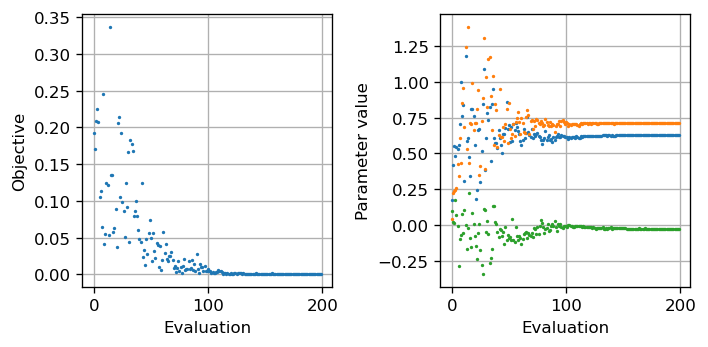

In [7]:
plt.figure(dpi = 120, figsize = (6, 3))

plt.subplot(1, 2, 1)
plt.plot(objectives, ".", markersize = 2)
plt.ylabel("Objective")
plt.xlabel("Evaluation")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(values, ".", markersize = 2)
plt.ylabel("Parameter value")
plt.xlabel("Evaluation")
plt.grid()

plt.tight_layout()
plt.savefig("figures/calibration.png")